Process text from entire books
===

* This could be the first step of a possible final project  
* In a further step text could be analyzed   
* Books could be rated according to certain dimensions  
* Find the music with the most similar lyrics to a book  

In [ ]:
import jupyter_black

jupyter_black

## From PDF to Text

In [1]:
#
#
#

## From Ebook to Text

In [43]:
# find epub files

from glob import glob

epubs = glob("/home/user/Dropbox/calibre/**/*.epub", recursive=True)

In [60]:
from epub2txt import epub2txt
import os

books_dir = "data/books"

# idx of some books
idx = [8, 9, 11, 12, 13, 14, 15, 16, 17]


if os.path.exists(books_dir) == False:
    os.makedirs(books_dir)

for i in idx:
    try:
        filepath = epubs[i]
        title = os.path.basename(filepath)[:-5]
        res = epub2txt(filepath)
        with open(books_dir + "/" + title + ".txt", "w") as fo:
            fo.write(res)
    except Exception as e:
        print(f"couldn't convert {title}: {e}")

couldn't convert Slow Learner - Thomas Pynchon: Entity 'nbsp' not defined, line 11, column 87 (<string>, line 11)


## Books that were already converted to txt

<div class="alert alert-warning">It is probably a better idea to use calibre for the epub to txt conversion.</div>

In [62]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import contractions


books = glob(books_dir + "/*.txt")

books

["data/books/Gravity's rainbow - Thomas Pynchon.txt",
 'data/books/V_ - Thomas Pynchon.txt',
 'data/books/Against the Day - Thomas Pynchon.txt',
 'data/books/The crying of lot 49 - Thomas Pynchon.txt',
 'data/books/The Sound and the Fury - William Faulkner; David Minter.txt',
 'data/books/Bleeding Edge - Pynchon, Thomas.txt',
 'data/books/Inherent Vice - Thomas Pynchon.txt',
 'data/books/Mason & Dixon - Thomas Pynchon.txt']

In [65]:
books[4]

'data/books/The Sound and the Fury - William Faulkner; David Minter.txt'

In [84]:
with open(books[4], "r") as fo:
    book = fo.readlines()

print(f"{books[4]} has {len(book)} paragraphs.")

data/books/The Sound and the Fury - William Faulkner; David Minter.txt has 233 paragraphs.


### Inspection
1. Novel starts at paragraph 58
2. There are meaningless numbers in the format "1.8" in between the text on single lines.
3. Each paragraph ends with `\n` which is not necessary here
4. There are entirely empty lines

#### 1.a Split more

In [88]:
# another paragraph split character?

spltchars = ["\xa0\xa0\xa0\xa0\xa0", "\xa0"]

# split further
for splch in spltchars:
    book = [a for b in [s.split(splch) for s in book] for a in b]

print(len(book), "paragraphs")

6859 paragraphs


#### 1.b Trim

In [94]:
book[4:].index("The Sound and the Fury\n")

18

In [96]:
book[23]

'April 7, 1928'

In [97]:
book = book[23:]

#### 2. Remove meaningless numbers and 3. remove `\n`

*Example*

In [98]:
book[22]

'1.8"Do you think buzzards are going to undress Damuddy." Caddy said. "You\'re crazy." "You\'re a skizzard." Jason said. He began to cry. "You\'re a knobnut." Caddy said. Jason cried. His hands were in his pockets. "Jason going to be rich man." Versh said. "He holding his money all the time." Jason cried. "Now you\'ve got him started." Caddy said. "Hush up, Jason. How can buzzards get in where Damuddy is. Father wouldn\'t let them. Would you let a buzzard undress you. Hush up, now." Jason hushed. "Frony said it was a funeral." he said. "Well it\'s not." Caddy said. "It\'s a party. Frony dont know anything about it. He wants your lightning bugs, T.P. Let him hold it a while." T.P. gave me the bottle of lightning bugs. "I bet if we go around to the parlor window we can see something." Caddy said. "Then you\'ll believe me." "I already knows." Frony said. "I dont need to see. "You better hush your mouth, Frony." Versh said. "Mammy going whip you." "What is it." Caddy said. "I knows what I 

In [99]:
book[0]

'April 7, 1928'

In [100]:
rm_pattern_1 = "^[0-9]*\.[0-9]*\\n$"
rm_pattern_2 = "\\n$"

for i, _ in enumerate(book):
    book[i] = re.sub(rm_pattern_1, "", book[i])
    book[i] = re.sub(rm_pattern_2, "", book[i])

*Example*

In [101]:
book[22]

'1.8"Do you think buzzards are going to undress Damuddy." Caddy said. "You\'re crazy." "You\'re a skizzard." Jason said. He began to cry. "You\'re a knobnut." Caddy said. Jason cried. His hands were in his pockets. "Jason going to be rich man." Versh said. "He holding his money all the time." Jason cried. "Now you\'ve got him started." Caddy said. "Hush up, Jason. How can buzzards get in where Damuddy is. Father wouldn\'t let them. Would you let a buzzard undress you. Hush up, now." Jason hushed. "Frony said it was a funeral." he said. "Well it\'s not." Caddy said. "It\'s a party. Frony dont know anything about it. He wants your lightning bugs, T.P. Let him hold it a while." T.P. gave me the bottle of lightning bugs. "I bet if we go around to the parlor window we can see something." Caddy said. "Then you\'ll believe me." "I already knows." Frony said. "I dont need to see. "You better hush your mouth, Frony." Versh said. "Mammy going whip you." "What is it." Caddy said. "I knows what I 

In [102]:
book[0]

'April 7, 1928'

#### 4. Remove empty lines

*Before*

In [103]:
for p in book[:7]:
    print(p)

April 7, 1928
Through the fence, between the curling flower spaces, I could see them hitting. They were coming toward where the flag was and I went along the fence. Luster was hunting in the grass by the flower tree. They took the flag out, and they were hitting. Then they put the flag back and they went to the table, and he hit and the other hit. Then they went on, and I went along the fence. Luster came away from the flower tree and we went along the fence and they stopped and we stopped and I looked through the fence while Luster was hunting in the grass. "Here, caddie." He hit. They went away across the pasture. I held to the fence and watched them going away. "Listen at you, now." Luster said. "Aint you something, thirty three years old, going on that way. After I done went all the way to town to buy you that cake. Hush up that moaning. Aint you going to help me find that quarter so I can go to the show tonight." They were hitting little, across the pasture. I went back along the 

*After*

In [104]:
book_trimmed = [p for p in book if p != ""]

for p in book_trimmed[:3]:
    print(p)

April 7, 1928
Through the fence, between the curling flower spaces, I could see them hitting. They were coming toward where the flag was and I went along the fence. Luster was hunting in the grass by the flower tree. They took the flag out, and they were hitting. Then they put the flag back and they went to the table, and he hit and the other hit. Then they went on, and I went along the fence. Luster came away from the flower tree and we went along the fence and they stopped and we stopped and I looked through the fence while Luster was hunting in the grass. "Here, caddie." He hit. They went away across the pasture. I held to the fence and watched them going away. "Listen at you, now." Luster said. "Aint you something, thirty three years old, going on that way. After I done went all the way to town to buy you that cake. Hush up that moaning. Aint you going to help me find that quarter so I can go to the show tonight." They were hitting little, across the pasture. I went back along the 

## Start analyzing the text

### Fix contractions & lower case

In [105]:
for i, _ in enumerate(book_trimmed):
    book_trimmed[i] = contractions.fix(book_trimmed[i]).lower()

### Tokenize paragraphs to sentences

In [106]:
import nltk
from copy import deepcopy

book_trimmed_tokenized = deepcopy(book_trimmed)

for i, p in enumerate(book_trimmed):
    book_trimmed_tokenized[i] = nltk.sent_tokenize(p)

### Sentiment scores for sentences

In [107]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

<div class="alert alert-warning">Let's see what is the difference between computing the score over the individual sentences or for the whole paragraph. It seems that this is an absolute value that accumulates the longer a text. High scores for long texts can thus be misleading. Is there a relative measure? Dividing by number of words or sentences? That would be necessary to make valid comparisons. I.e. 2 books could have both positive scores, but one has higher scores. Could it be because of its length?</div>

#### One example paragraph

In [108]:
p_i = 6  # paragraph index

print("A) whole paragraph:\n")
print(book_trimmed[p_i])
print("=>", sid.polarity_scores(book_trimmed[p_i])["compound"])

print("\nB) single sentences:\n")
for sent in book_trimmed_tokenized[p_i]:
    print(sent)
    print("=>", sid.polarity_scores(sent)["compound"])

A) whole paragraph:

19.5"they are not nothing over yonder but houses." luster said. "we going down to the branch." they were washing down at the branch. one of them was singing. i could smell the clothes flapping, and the smoke blowing across the branch. "you stay down here." luster said. "you are not got no business up yonder. them folks hit you, sho." "what he want to do." "he do not know what he want to do." luster said. "he think he want to go up yonder where they knocking that hall. you sit down here and play with your jimson weed. look at them chillen playing in the branch, if you got to look at something. how come you cannot behave yourself like folks." i sat down on the bank, where they were washing, and the smoke blowing blue. "is you all seen anything of a quarter down here." luster said."what quarter." ""the one i had here this morning." luster said. "i lost it somewhere. it fell through this here hole in my pocket. if i do not find it i cannot go to the show tonight." "whe

#### Across all paragraphs

In [109]:
scores = []

for p in book_trimmed:
    scores.append(sid.polarity_scores(p)["compound"])

##### Total score of this book

In [110]:
np.sum(scores)

15.675500000000003

##### Average score of this book

In [111]:
np.mean(scores)

0.004618591632292281

The book seems neutral according to the sentiment scores.

##### Most positive paragraph in the book

In [112]:
print(book_trimmed[np.argmax(scores)])
print("=>", np.max(scores))

1.3"if we go slow, it will be dark when we get there." quentin said. "i am not going slow." caddy said. we went up the hill, but quentin did not come. he was down at the branch when we got to where we could smell the pigs. they were grunting and snuffing in the trough in the comer. jason came behind us, with his hands in his pockets. roskus was milking the cow in the barn door. 10.1the cows came jumping out of the barn."go on." t.p. said. "holler again. i going to holler myself. whooey." quentin kicked t.p. again. he kicked t.p. into the trough where the pigs ate and t.p. lay there. "hot dog." t.p. said. "did not he get me then. you see that white man kick me that time. whooey." i was not crying, but i could not stop. i was not crying, but the ground was not still, and then i was crying. the ground kept sloping up and the cows ran up the hill. t.p. tried to get up. he fell down again and the cows ran down the hill. quentin held my arm and we went toward the barn. then the barn was not 

##### Most negative paragraph in the book

In [113]:
print(book_trimmed[np.argmin(scores)])
print("=>", np.min(scores))

what have i done to have been given children like these benjamin was punishment enough and now for her to have no more regard for me her own mother i have suffered for her dreamed and planned and sacrificed i went down into the valley yet never since she opened her eyes has she given me one unselfish thought at times i look at her i wonder if she can be my child except jason he has never given me one moment's sorrow since i first held him in my arms i knew then that he was to be my joy and my salvation i thought that benjamin was punishment enough for any sins i have committed i thought he was my punishment for putting aside my pride and marrying a man who held himself above me i do not complain i loved him above all of them because of it because my duty though jason pulling at my heart all the while but i see now that i have not suffered enough i see now that i must pay for your sins as well as mine what have you done what sins have your high and mighty people visited upon me but you 

<div class="alert alert-warning">With respect to what I wrote before about the sentiment score I am not surprised that both examples are very long paragraphs.</div>

##### How the score develops throughout the book

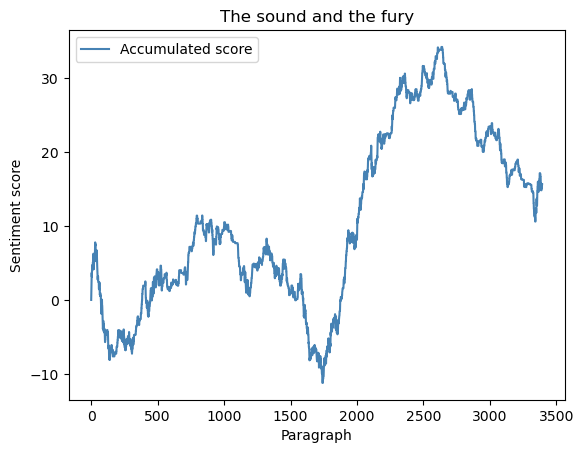

In [114]:
plt.plot(np.cumsum(scores), color="steelblue", label="Accumulated score")
plt.title("The sound and the fury")
plt.ylabel("Sentiment score")
plt.xlabel("Paragraph")
plt.legend();

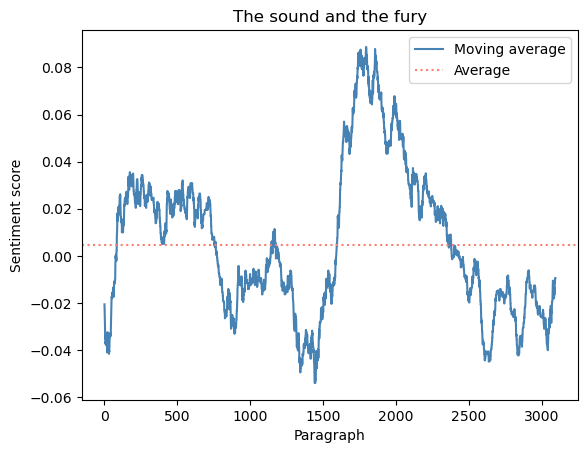

In [115]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), "valid") / w


window = 300  # smoothness of convolution

plt.plot(moving_average(scores, window), label="Moving average", color="steelblue")
plt.axhline(np.mean(scores), label="Average", color="salmon", linestyle=":")
plt.title("The sound and the fury")
plt.ylabel("Sentiment score")
plt.xlabel("Paragraph")
plt.legend();

Looks like we arrive emotionally to the first minimum around paragraph 700. There two more, one in the middle of the book and one close to the end.  